# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [9]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

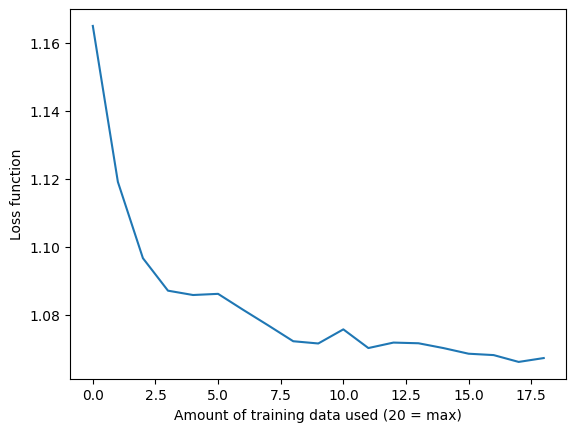

In [11]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [12]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

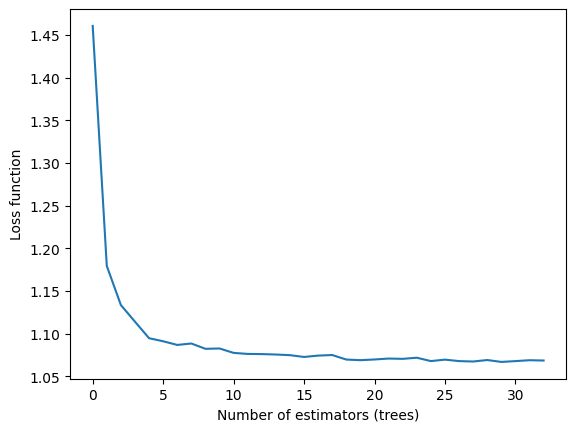

In [13]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

***Explaination of plots and whether the X axis should be Number of estimators or the Amount of training data used.***

Lower RMSE Indicates better model performance, as the predictions are closer to the actual values and Higher RMSE Indicates worse performance, as the predictions deviate more from the actual values.

Advantages of RMSE:
Sensitive to Large Errors and RMSE penalizes large errors more than small ones because it squares the differences. This makes it useful when large errors are particularly undesirable.Same Units as Target Variable, RMSE is in the same units as the target variable, making it easier to interpret.

Disadvantages of RMSE:
Sensitive to Outliers Since RMSE squares the errors, it is highly sensitive to outliers in the data.Not Normalized
RMSE does not provide a normalized measure, so it can be difficult to compare across datasets with different scales.

Since RMSE is sensitive to outliers the X axis should be amount of training data used as the model will generalise better.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rodsaldanha/arketing-campaign")

print("Path to dataset files:", path)
df_marketing_campaign = pd.read_csv(path + "/marketing_campaign.csv", sep=';')
df_marketing_campaign.head()

Path to dataset files: /Users/sudeemangalwadekar/.cache/kagglehub/datasets/rodsaldanha/arketing-campaign/versions/8


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [17]:
X = df_marketing_campaign[['Income', 'MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'Complain', 'Z_Revenue']]
y = df_marketing_campaign['Response']

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 0.3337281872953535


In [19]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [2, 4, 6, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring="neg_root_mean_squared_error",
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform the random search on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters for Random forest model predicting a response:", random_search.best_params_)
print("Best Score for Random forest model predicting a response:", random_search.best_score_)

Best Parameters for Random forest model predicting a response: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Score for Random forest model predicting a response: -0.3284094464258447


In [20]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

RMSE: 0.3337281872953535
MAE: 0.22333860824475643
R² Score: 0.1452216645941914


# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

(448,) (448,)


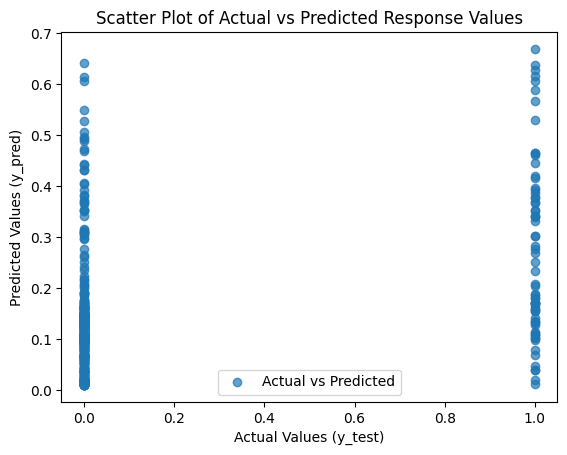

In [26]:
import matplotlib.pyplot as plt

print(y_test.shape, y_pred.shape)
plt.scatter(y_test, y_pred, label="Actual vs Predicted", alpha=0.7)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot of Actual vs Predicted Response Values")
plt.legend()
plt.show()
